# Assignment 1
Roshifah Dinilqoyyimah A

PYTN-KS10-020

## 1. Import required libraries

In [124]:
# import library
import numpy as np
import pandas as pd

# for plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#styling
mpl.style.use(('ggplot'))

# for wordcloud
from wordcloud import WordCloud

## 2. Membaca dataset dan Preprocessing

In [125]:
# non standard missing values detection
misval = ['na', 'n/a', '--', '?', 'NA']
# read dataset
df_lc = pd.read_csv('london_crime_by_lsoa.csv',
                    na_values=misval)

In [126]:
df_lc

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [127]:
# dimensi data
baris, kolom =df_lc.shape
print(baris, 'baris')
print(kolom, 'kolom')

13490604 baris
7 kolom


In [128]:
# rename kolom
df_lc =df_lc.rename(columns=
                    {'lsoa_code':'LSOA_Code',
                    'borough':'Borough',
                    'major_category':'Major_Category',
                    'minor_category':'Minor_Category',
                    'value':'Value',
                    'year':'Year',
                    'month':'Month'})

In [129]:
# menampilkan kolom yang ada di dataset
columns = df_lc.columns
columns

Index(['LSOA_Code', 'Borough', 'Major_Category', 'Minor_Category', 'Value',
       'Year', 'Month'],
      dtype='object')

In [130]:
# mengetahui jumlah missing values
for col in columns:
    print('Jumlah Standard Missing Values Pada Kolom {} adalah {}'.format(
          col, df_lc[col].isnull().sum()))

Jumlah Standard Missing Values Pada Kolom LSOA_Code adalah 0
Jumlah Standard Missing Values Pada Kolom Borough adalah 0
Jumlah Standard Missing Values Pada Kolom Major_Category adalah 0
Jumlah Standard Missing Values Pada Kolom Minor_Category adalah 0
Jumlah Standard Missing Values Pada Kolom Value adalah 0
Jumlah Standard Missing Values Pada Kolom Year adalah 0
Jumlah Standard Missing Values Pada Kolom Month adalah 0


In [131]:
# mengetahui info pada data
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   LSOA_Code       object
 1   Borough         object
 2   Major_Category  object
 3   Minor_Category  object
 4   Value           int64 
 5   Year            int64 
 6   Month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [132]:
# Mengetahui nilai unique setiap kolom untuk menentukan data dengan tipe anomali
string_columns = ['Borough', 'Major_Category', 'Minor_Category']
integer_columns = ['Value', 'Year', 'Month']

for string_col in string_columns:
    print('Nilai Unik Untuk Kolom ', string_col)
    print("[", end='')
    for unique_val in df_lc[string_col].unique():
        print(unique_val, end=', ')
    print("]")
    print("="*30)
    
for int_col in integer_columns:
    print('Nilai Unik Untuk Kolom', int_col)
    print(df_lc[int_col].unique())
    print("="*30)

Nilai Unik Untuk Kolom  Borough
[Croydon, Greenwich, Bromley, Redbridge, Wandsworth, Ealing, Hounslow, Newham, Sutton, Haringey, Lambeth, Richmond upon Thames, Hillingdon, Havering, Barking and Dagenham, Kingston upon Thames, Westminster, Hackney, Enfield, Harrow, Lewisham, Brent, Southwark, Barnet, Waltham Forest, Camden, Bexley, Kensington and Chelsea, Islington, Tower Hamlets, Hammersmith and Fulham, Merton, City of London, ]
Nilai Unik Untuk Kolom  Major_Category
[Burglary, Violence Against the Person, Robbery, Theft and Handling, Criminal Damage, Drugs, Fraud or Forgery, Other Notifiable Offences, Sexual Offences, ]
Nilai Unik Untuk Kolom  Minor_Category
[Burglary in Other Buildings, Other violence, Personal Property, Other Theft, Offensive Weapon, Criminal Damage To Other Building, Theft/Taking of Pedal Cycle, Motor Vehicle Interference & Tampering, Theft/Taking Of Motor Vehicle, Wounding/GBH, Other Theft Person, Common Assault, Theft From Shops, Possession Of Drugs, Harassment, 

In [133]:
# Total Missing Values
print("Total dari keseluruhan missing values = ",
      df_lc.isnull().sum().sum())

Total dari keseluruhan missing values =  0


In [134]:
# menyiapkan list 'Tahun' 
years = list(map(int,np.sort(df_lc['Year'].unique())))

# menyiapkan list 'Wilayah' 
borough = list(df_lc['Borough'].unique())

# menyiapkan list 'Kejahatan Mayor' 
major_categories = list(df_lc['Major_Category'].unique())

# Menyiapkan color_list untuk kebutuhan visualisasi grafik
colors_list = ['darkcyan', 'seagreen', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna']

# Menyiapkan range list untuk months
months = list(range(1,13))

## 3. Analisis dan Visualisasi Data

### Line Plot

question 1: Bagaimana tren total kasus kejahatan yang terjadi pada tahun 2008 - 2016 untuk setiap bulannya?

-> membuat data frame untuk melihat total kasus kejahatan yang terjadi untuk setiap bulan

In [135]:
data = {}
for year in years:
    # megambil semua data pada Year, grouping berdasarkan 'Month', lalu menjumlahkan Valuenya
    crime_tahun_perbulan = df_lc[
        (df_lc['Year'] == year)
    ].groupby('Month')['Value'].sum()
    
    # Series untuk dataframe
    data[year] = pd.Series(
        data=map(int, crime_tahun_perbulan.reset_index()['Value'].values),
        index=crime_tahun_perbulan.index
    )

# Membuat dataframe dengan Month sebagai index dan Years sebagai columns
df_crime_tahun_perbulan = pd.DataFrame(
    columns=years,
    index=range(1,13,1),
    data=data
)

# membuat kolom total
df_crime_tahun_perbulan['Total'] = df_crime_tahun_perbulan[years].sum(axis=1)

# rename index dengan nama bulan
months_name = ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dict_index = {}
for i in range(1,13,1):
    dict_index[i] = months_name[i-1]
df_crime_tahun_perbulan.rename(index=dict_index, inplace=True)

In [136]:
df_crime_tahun_perbulan

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704
Jun,62290,63116,62632,61822,62281,56839,57039,60760,62262,549041
Jul,64126,63281,63764,62428,63280,60508,58564,61606,65519,563076
Aug,59959,58695,59040,59117,62143,57467,55641,58056,62666,532784
Sep,58414,57847,59731,58640,56912,54924,56933,57564,61412,522377
Oct,63354,61176,62113,63622,61728,59956,60537,62361,63405,558252


-> Visualisasi

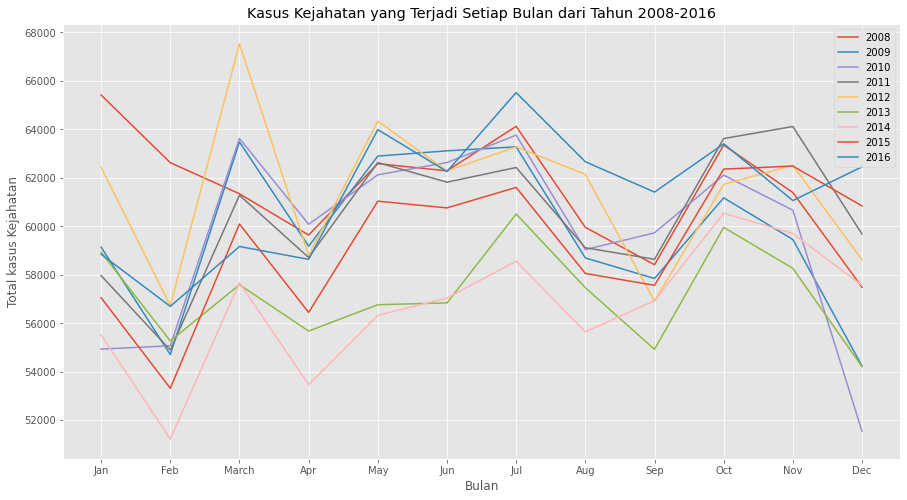

In [137]:
ax=df_crime_tahun_perbulan[years].plot(figsize=(15,8),
                                    xticks=range(0,12))
ax.legend(loc='upper right')
plt.title('Kasus Kejahatan yang Terjadi Setiap Bulan dari Tahun 2008-2016');
plt.ylabel('Total kasus Kejahatan');
plt.xlabel('Bulan');

-> Analisis

dari line chart diatas, terlihat pada setiap awal tahun dari 2008 - 2016 total kasus kejahatan menurun di bulan januari - februari. begitu juga di akhir tahun yakni menuju bulan desember total kasus kejahatan cenderung menurun. dan total kasus kejahatan naik cukup tinggi di bulan maret.

### Bar Chart

question 1: Apa 5 wilayah yang total kasus kejahatannya paling tinggi dari tahun 2018-2016?

-> membuat data frame untuk melihat wilayah dengan total kasus tertinggi

In [138]:
data = {}
for year in years:
    # megambil semua data pada Year, grouping berdasarkan 'Month', lalu menjumlahkan Valuenya
    crime_borough = df_lc[
        df_lc['Year'] == year
    ].groupby('Borough')['Value'].sum()
    
    # Series untuk dataframe
    data[year] = pd.Series(
        data=map(int, crime_borough.reset_index()['Value'].values),
        index=crime_borough.index
    )

# Membuat dataframe dengan 'Wilayah' sebagai index dan years sebagai columns
df_crime_borough = pd.DataFrame(
    columns=years,
    index=borough,
    data=data
)
df_crime_borough['Total'] = df_crime_borough[years].sum(axis=1)

# urutkan data berdasarkan 'Total' dari tertinggi ke terendah
df_crime_borough.sort_values(by='Total', ascending=False, inplace=True)

In [139]:
df_crime_borough.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


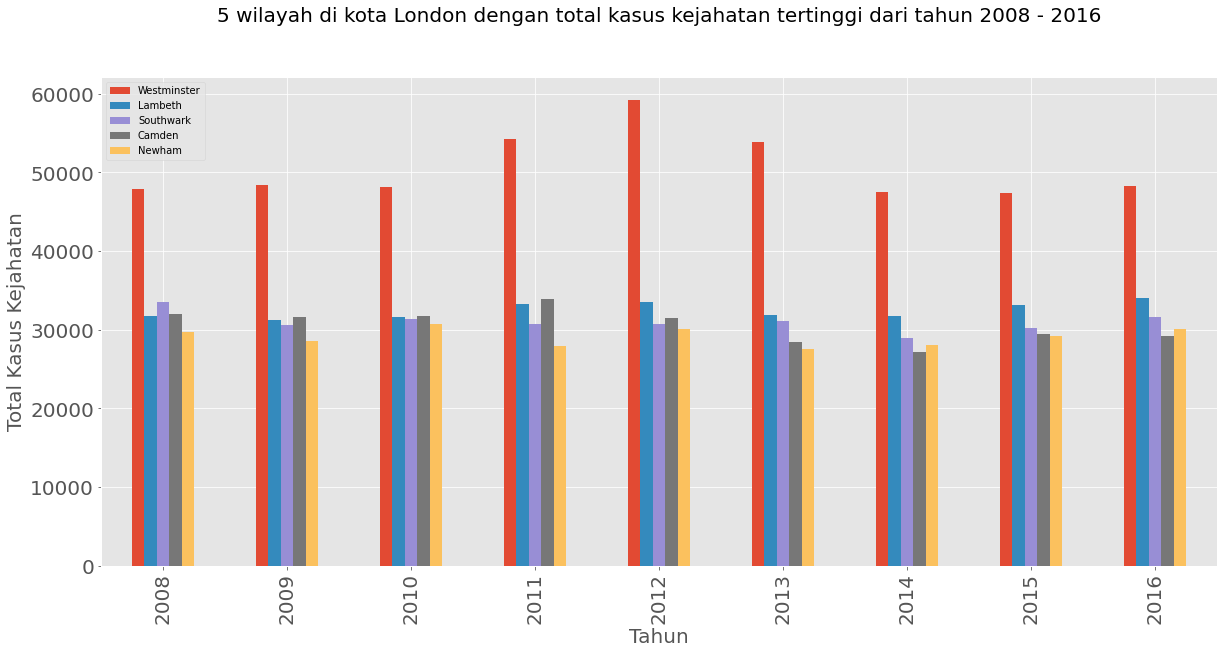

In [140]:
df_crime_borough[years].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London dengan total kasus kejahatan tertinggi dari tahun 2008 - 2016', fontsize=20, y=1.1)
plt.show()

-> Analisis

berdasarkan bar chart untuk 5 wilayah dengan total kasus kejahatan tertinggi, terlihat wilayah westminster memiliki total kasus tertinggi pada setiap tahunnya dibanding empat wilayah lain. dan pada tahun 2012 total kasus kejahatan di wilayah westminster tertinggi mencapai angka 59226 kasus kejahatan. untuk empat wilayah lain seperti Lambeth, Southwark, Camdem, Newham rentang perbedaannya tidak terlalu jauh.

### Area Plot

question 1: bagaimana visualisasi dari 5 kejahatan major category yang sering terjadi?

-> membuat dataframe untuk total kasus major category tiap tahun

In [141]:
data = {}
for year in years:
    # Ambil semua data pada 'year', grouping berdasarkan 'Major_Category', lalu menjumlahkan valuenya
    majorctg_tahun = df_lc[
        df_lc['Year'] == year
    ].groupby('Major_Category')['Value'].sum()
    
    # menyiapkan Series
    data[year] = pd.Series(
        data=map(int, majorctg_tahun.reset_index()['Value'].values),
        index=majorctg_tahun.index
    )

# Membuat dataframe dengan 'Major_Categories' sebagai index dan years sebagai columns
df_majorctg_tahun = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data
)
df_majorctg_tahun['Total'] = df_majorctg_tahun[years].sum(axis=1)

# urutkan data berdasarkan Total dari tertinggi ke terendah
df_majorctg_tahun.sort_values(by='Total', ascending=False, inplace=True)

In [142]:
df_majorctg_tahun.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


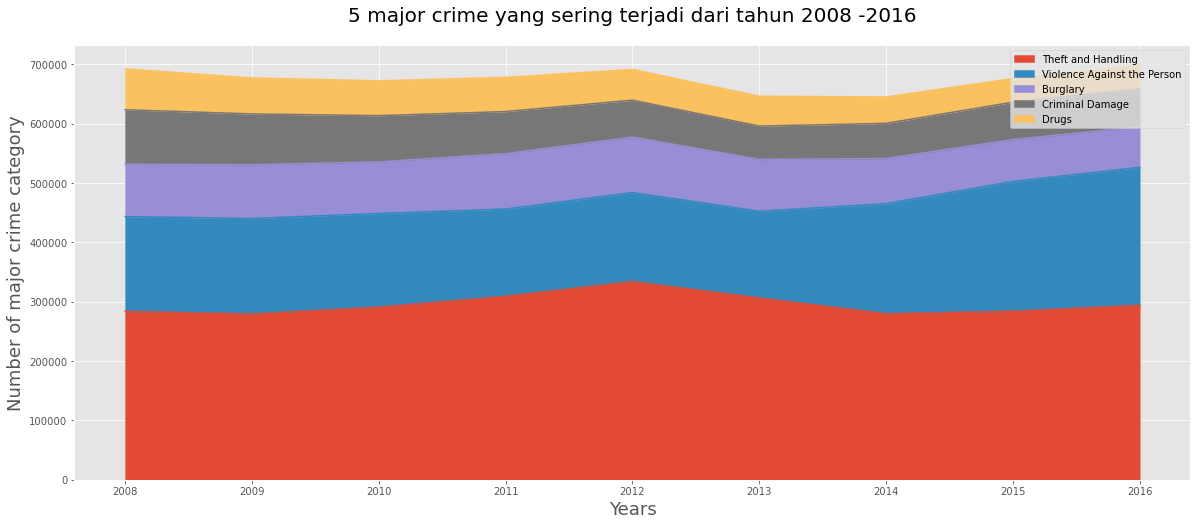

In [143]:
# buat dataframe baru dengan mengambil 5 data teratas yang total kasus kejahatannya tertinggi lalu transpose
df_majorctg = df_majorctg_tahun[:5][years].transpose()
df_majorctg.plot(
    kind='area',
    stacked=True,
    figsize=(20,8)
)
plt.title('5 major crime yang sering terjadi dari tahun 2008 -2016', fontsize=20, y=1.04)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of major crime category', fontsize=18)
plt.legend(loc='upper right', fontsize=10)
plt.show()

-> Analisis

dapat dilihat dari grafik area  bahwa akumulasi dari 5 major category yang sering terjadi di london yakni Theft and Handling, Violence Against the Person, Burglary, Criminal Damage, dan Drugs cenderung meningkat dari tahun 2008 hingga 2012. namun, dari tahun 2012 hingga 2103 mengalami penurunan. dan meningkat kembali dari tahun 2014 hingga 2016.

Theft and Handling menjadi kategori kejahatan yang paling sering terjadi ditandai dengan luas daerah arsiran pada area plot diatas paling tebal.

### Histogram

question 1: berapa kisaran total kasus kejahatan di sebagian besar wilayah kota london pada tahun 2012?

In [144]:
df_2012 = df_crime_borough[2012]

In [145]:
count, bin_edges = np.histogram(df_2012, bins=10)
print(count)
print(bin_edges)

[ 1  4  4 12  6  5  0  0  0  1]
[  157.   6063.9 11970.8 17877.7 23784.6 29691.5 35598.4 41505.3 47412.2
 53319.1 59226. ]


In [146]:
df_2012

Westminster               59226
Lambeth                   33473
Southwark                 30737
Camden                    31472
Newham                    30067
Croydon                   30189
Ealing                    28832
Islington                 26268
Tower Hamlets             26784
Brent                     26357
Hackney                   27095
Lewisham                  23652
Haringey                  23231
Barnet                    23573
Hillingdon                22103
Wandsworth                24457
Waltham Forest            22647
Enfield                   21069
Hounslow                  22724
Hammersmith and Fulham    21030
Bromley                   19622
Redbridge                 21424
Greenwich                 20028
Kensington and Chelsea    19757
Barking and Dagenham      15990
Havering                  15965
Harrow                    12803
Merton                    12856
Bexley                    11669
Sutton                    10948
Richmond upon Thames      11168
Kingston

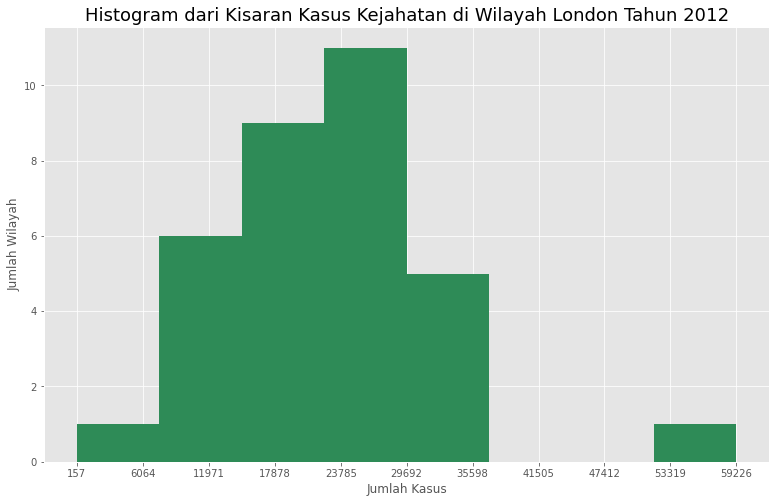

In [147]:
df_2012.plot(kind='hist',
             xticks=bin_edges,
             bins=8,
             figsize=(13,8),
             color='seagreen');
plt.title("Histogram dari Kisaran Kasus Kejahatan di Wilayah London Tahun 2012", fontsize=18);
plt.xlabel("Jumlah Kasus");
plt.ylabel("Jumlah Wilayah");
plt.show()

-> Analisis

Berdasarkan visualisasi histogram diatas, maka dapat dilihat bahwa kasus kejahatan dengan jumlah wilayah yang paling tinggi pada tahun 2012 berada di jumlah kisaran 23.785 - 29.692 yang dimana terjadi pada lebih dari 10 jumlah wilayah di London. Jumlah kasus paling sedikit pada tahun 2012 memiliki total 157 kasus, dan jumlah kasus terbesar pada tahun 2012 yaitu dengan total 59.226 kasus.

### Pie Chart

question 1: Bagaimana persentase kejahatan major yang terjadi di wilayah London dari tahun 2008 - 2016?

In [148]:
# Groupby dataframe berdasarkan Major Category
df_majorctg_sum = df_lc.groupby('Major_Category', axis=0).sum()
df_majorctg_sum

,Value,Year,Month
Major_Category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


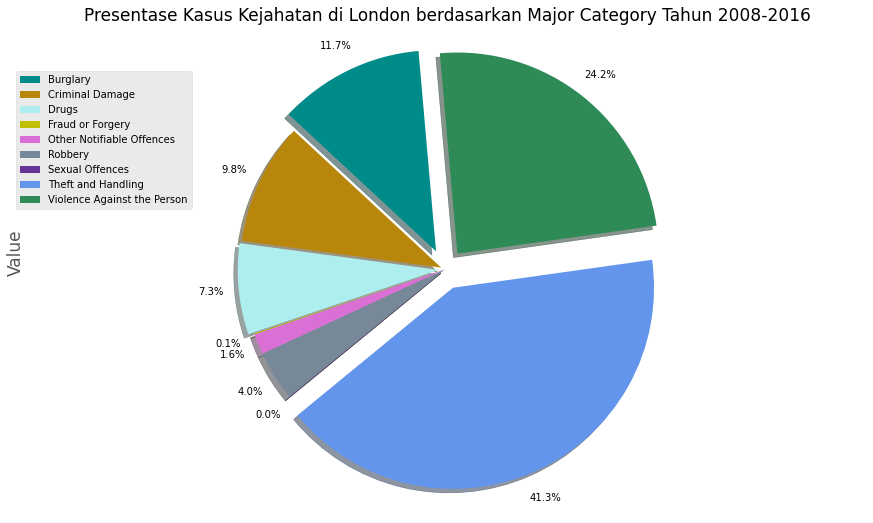

In [149]:
# To offset each wedge
explode_list = [0.1, 0.02, 0.03, 0, 0, 0, 0, 0.1, 0.1]

# Graded-Funtion Begin
df_majorctg_sum['Value'].plot(kind='pie',
                       figsize=(15,9),
                       autopct='%1.1f%%',
                       startangle=95,
                       shadow=True,
                       labels=None, # turn off labels on pie chart
                       explode=explode_list,
                       pctdistance=1.14, # the ratio between the center of each pie slice
                       colors=['darkcyan', 'darkgoldenrod', 'paleturquoise', 'y', 'orchid', 'lightslategray', 'rebeccapurple', 'cornflowerblue', 'seagreen'])

# Scale the title to match pctdistance above
plt.title('Presentase Kasus Kejahatan di London berdasarkan Major Category Tahun 2008-2016', y=1, x=0.5, fontsize=17)
plt.ylabel('Value', fontsize=17, y=0.54)
plt.axis('equal')

# Add Legend
plt.legend(labels=df_majorctg_sum.index.values, loc='upper right', bbox_to_anchor=(0.2,0.92))

plt.show()

-> Analisis

dari pie chart kasus kejahatan berdasarkan major category tahun 2008 hingga 2016, presentase total kasus tertinggi dipegang oleh kategori Theft and Handling dengan 41.3%. dan kategori sexual offences memiliki peresentase total kasus terkecil yaitu 0.0%.

### Box Plot

question 1: Bagaimana representasi statistik dari total kasus kejahatan yang terjadi pada setiap wilayah di kota London tahun 2008-2016?


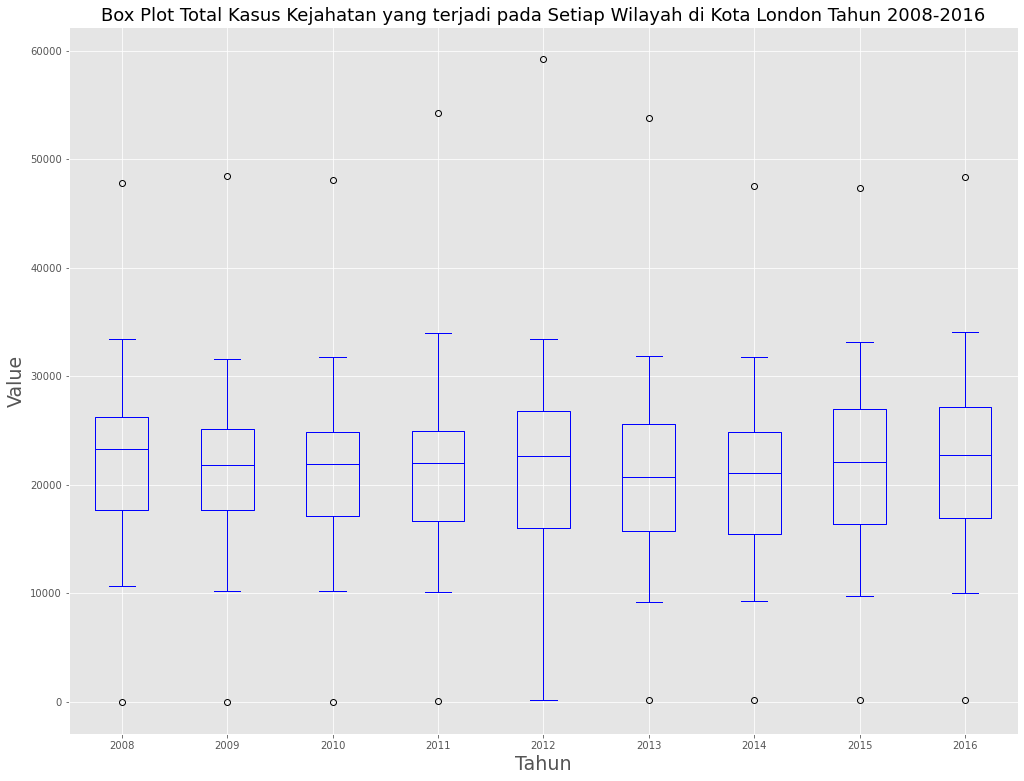

In [150]:
# menggunakan df yang telah dibuat di bar chart
df_crime_borough[years].plot(kind='box',
                             figsize=(17,13),
                             color='blue')

plt.xlabel('Tahun', fontsize=19)
plt.ylabel('Value', fontsize=19)
plt.title('Box Plot Total Kasus Kejahatan yang terjadi pada Setiap Wilayah di Kota London Tahun 2008-2016',  fontsize=18, y=1)
plt.show()

-> Analisis

Berdasarkan visualisasi box plot diatas, Pada setiap tahunnya rata-rata total kasus kejahatan yang terjadi pada setiap wilayah di London berada dalam kisaran sekitar 23.000 - 26.000an kejadian. Dan Interval antara titik data pada total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang kurang lebih mirip atau serupa, kecuali pada tahun 2012. Range total kasus kejahatan pada tahun 2012 terlihat lebih tersebar dibandingkan tahun lainnya.

### Scatter Plot

question 1: Bagaimana trend kasus kejahatan di london pada tahun 2008 hingga 2016 ?

In [151]:
df_scaplot = pd.DataFrame(df_lc.groupby(['Year'], axis=0).sum())

# mengatur ulang indeks untuk dimasukkan kembali sebagai kolom di kerangka data df_scaplot
df_scaplot.reset_index(inplace=True)

df_scaplot

,Year,Value,Month
0,2008,738641,9743214
1,2009,717214,9743214
2,2010,715324,9743214
3,2011,724915,9743214
4,2012,737329,9743214
5,2013,686407,9743214
6,2014,680183,9743214
7,2015,711624,9743214
8,2016,736121,9743214


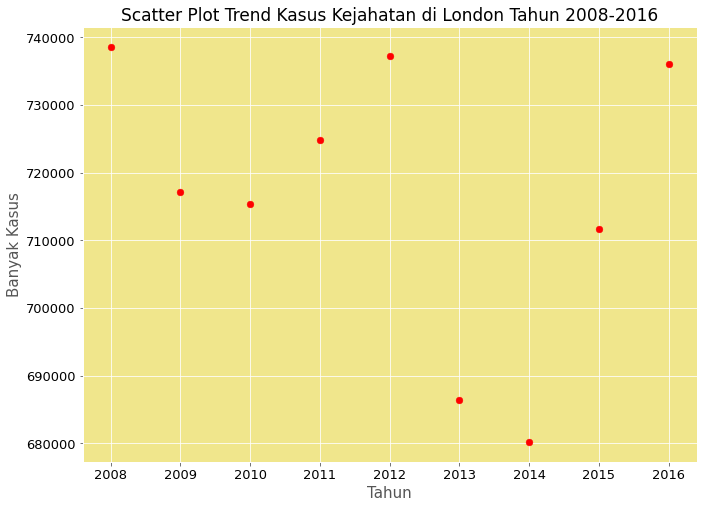

In [152]:
ax = df_scaplot.plot(kind='scatter', x='Year', y='Value', s=45,
                     figsize=(11,8), color='r')
# setting latar
ax.set_facecolor('khaki')

# mengatur scatter plot
plt.title('Scatter Plot Trend Kasus Kejahatan di London Tahun 2008-2016', color= 'black', fontsize=17, y=1)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Banyak Kasus', fontsize=15)
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)

plt.show()

-> Analisis

Dari scatter plot trend kasus kejahatan di London tahun 2008 - 2016, dapat diketahui bahwa pada rentang tahun 2008 - 2012 memiliki jumlah kasus yang masih terbilang tinggi yaitu dengan total kasus sekitar 710.000 hingga 740.000. Kemudian pada tahun berikutnya yaitu 2013 dan 2014, jumlah kasus mengalami penurunan yang sangat jauh rentangnya dari tahun sebelumnya yaitu berada dibawah angka 690.000. Namun, pada tahun 2015 dan 2016 jumlah kasus  mengalami kenaikan kembali diatas angka 710.000.

### Word Clouds

question 1: bagaimana tampilan word cloud untuk kejahatan major?

In [153]:
major_crime = open('major_crime.txt', 'r').read()

In [154]:
# import package and set stopwords
from wordcloud import WordCloud, STOPWORDS

In [155]:
# set untuk menghapus stopwords yang berlebihan
stopwords = set(STOPWORDS)

In [156]:
# inisiasi wordcloud
majorctg_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate wordcloud
majorctg_wc.generate(major_crime)

(-0.5, 399.5, 199.5, -0.5)

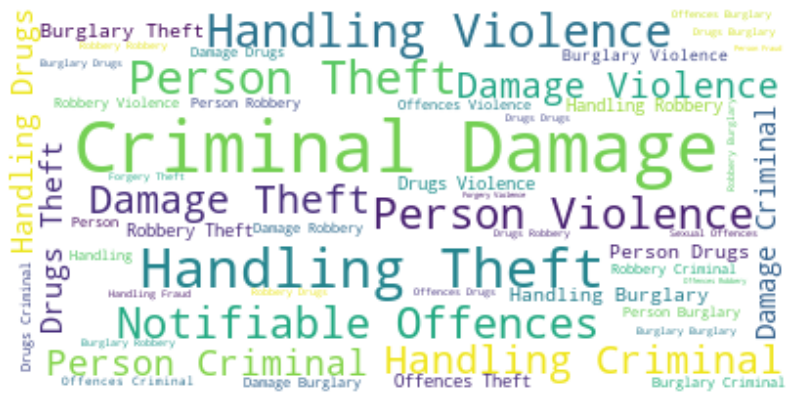

In [157]:
# tampilkan wordcloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(majorctg_wc, interpolation='bilinear');
plt.axis('off')

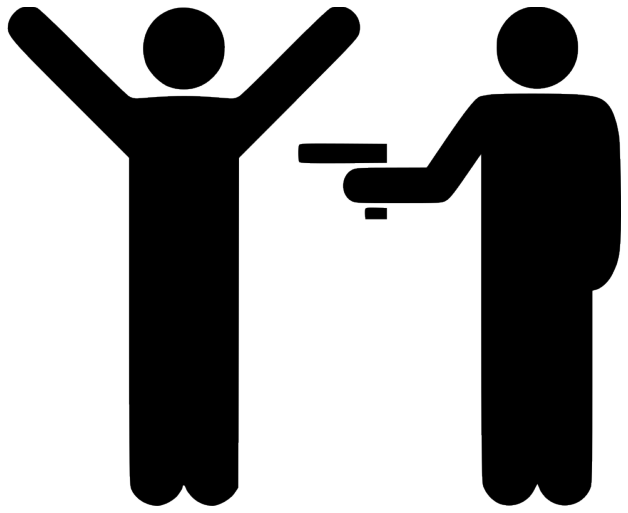

In [158]:
# Masking
from PIL import Image
crime_png = np.array(Image.open('Crime.png'))

fig = plt.figure()
fig.set_figwidth(11)
fig.set_figheight(15)

plt.imshow(crime_png, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

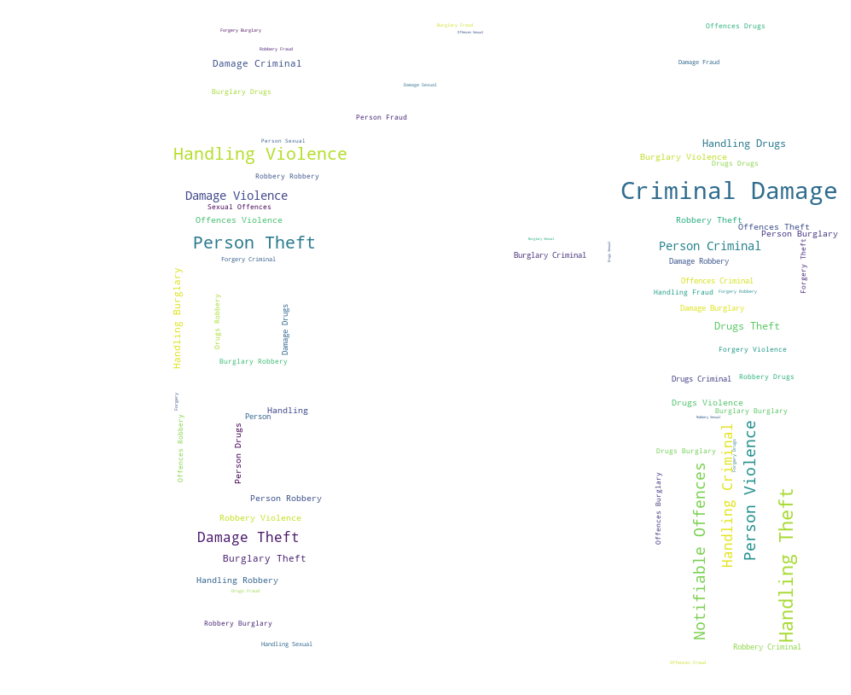

In [159]:
# inisiasi wordcloud
majorctg_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=2000,
    mask=crime_png
)

# generate wordcloud
majorctg_wc.generate(major_crime)

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(16)

plt.imshow(majorctg_wc, interpolation='bilinear');
plt.axis('off');

-> Analisis

word cloud tersebut dibuat berdasarkan jumlah major category kasus kejahatan di London. dapat diketahui berdasarkan wordcloud pada jumlah major category, kasus kejahatan di London yang paling mendominasi yaitu diantaranya Criminal Damage, Handling Theft, Handling Violance, Person Theft, Person Violance, Notifiable Offences, dan Damage Theft.

## Overall Analisis

Setelah melakukan analisis pada data london crime by LSOA pada rentang tahun 2008-2016 yakni dengan melakukan visualisasi menggunakan line plot, area plot, histogram, bar chart, pie chart, box plot, scatter plot, serta word clouds maka, informasi yang bisa diambil adalah:

1. Pada rentang tahun 2008-2016, kasus kejahatan cenderung menurun pada awal dan akhir tahun (februari, desember). akan tetapi, masih terhitung fluktuatif karena di beberapa bulan meningkat dan di beberapa bulan selanjutnya menurun kemudian meningkat kembali dan menurun kembali. 

2. Dengan menggunakan bar chart, diketahui wilayah westminster memiliki total kasus tertinggi pada setiap tahunnya. sekalipun setelah tahun 2012 (dengan total kasus tertinggi yaitu 59226) kasus kejahatan di westminster mulai berkurang, tetapi tetap saja masih terhitung tingkat kejahatannya lebih tinggi daripada wilayah lainnya. meskipun begitu, itu tidak hanya mencerminkan penduduk Westminster mengingat wilayah westminster juga menjadi tujuan wisata yang berkembang pesat pada rentang waktu itu (https://www.verisure.co.uk/advice-and-help/crime-statistics/westminster-crime-rates#:~:text=Westminster%20enjoys%20the%20title%20of,thereby%20boosting%20petty%2Dcrime%20rates.).

3. Jenis tindakan kejahatan/kasus yang sering terjadi di london adalah Theft and Handling. sedangkan kasus kejahatan Sexual Offences sangat jarang terjadi di kota London dalam rentang tahun 2008 - 2016. akan tetapi, Kasus kejahatan Violence Against the Person mengalami peningkatan yang lebih signifikan dibandingkan Theft and Handling pada tahun 2014 sampai 2016 di kota London.
